# Bibliotecas

In [13]:
import numpy as np
import pandas as pd
import joblib

from src.utils import get_path_projeto

import pickle
import joblib
from matplotlib import pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor

# Dados

In [14]:
dir_projeto = get_path_projeto()
dir_staged = dir_projeto / "data/staged"
dir_models = dir_projeto / "models"

# 1. Carregando os dados
path_train_test_data = dir_staged / "train_test_data.pkl"

with open(path_train_test_data, "rb") as pkl_f:
    train_test_data = pickle.load(file=pkl_f)

X = train_test_data["X"]["raw"]
X_train = train_test_data["X"]["train"]
X_test = train_test_data["X"]["test"]

y = train_test_data["y"]["raw"]
y_train = train_test_data["y"]["train"]
y_test = train_test_data["y"]["test"]

# 2. Scaler
scaler = joblib.load(dir_models / "min_max_scaler.joblib")

# Treino

In [15]:
model = SVR(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

/home/alecrim/workspace/alecrim-fiap-tech-challenge-tres/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Desempenho

In [24]:
y_pred = model.predict(X_test).reshape(-1,1)

rmse = root_mean_squared_error(
    scaler.inverse_transform(y_pred),
    scaler.inverse_transform(y_test)
)

print(f"{rmse = }")

rmse = 193.91838560971274


In [17]:
dummy_regressor = DummyRegressor()
dummy_regressor.fit(X_train, y_train)

y_pred = dummy_regressor.predict(X_test).reshape(-1,1)

rmse_dummy = root_mean_squared_error(
    scaler.inverse_transform(y_pred),
    scaler.inverse_transform(y_test)
)
print(f"{rmse_dummy = }")

rmse_dummy = 1432.8172531171674


In [19]:
diferenca_percentual = (rmse_dummy - rmse) / rmse * 100
print(f"Diferença entre os RMSEs: {diferenca_percentual:.4f} %")

Diferença entre os RMSEs: 638.8764 %


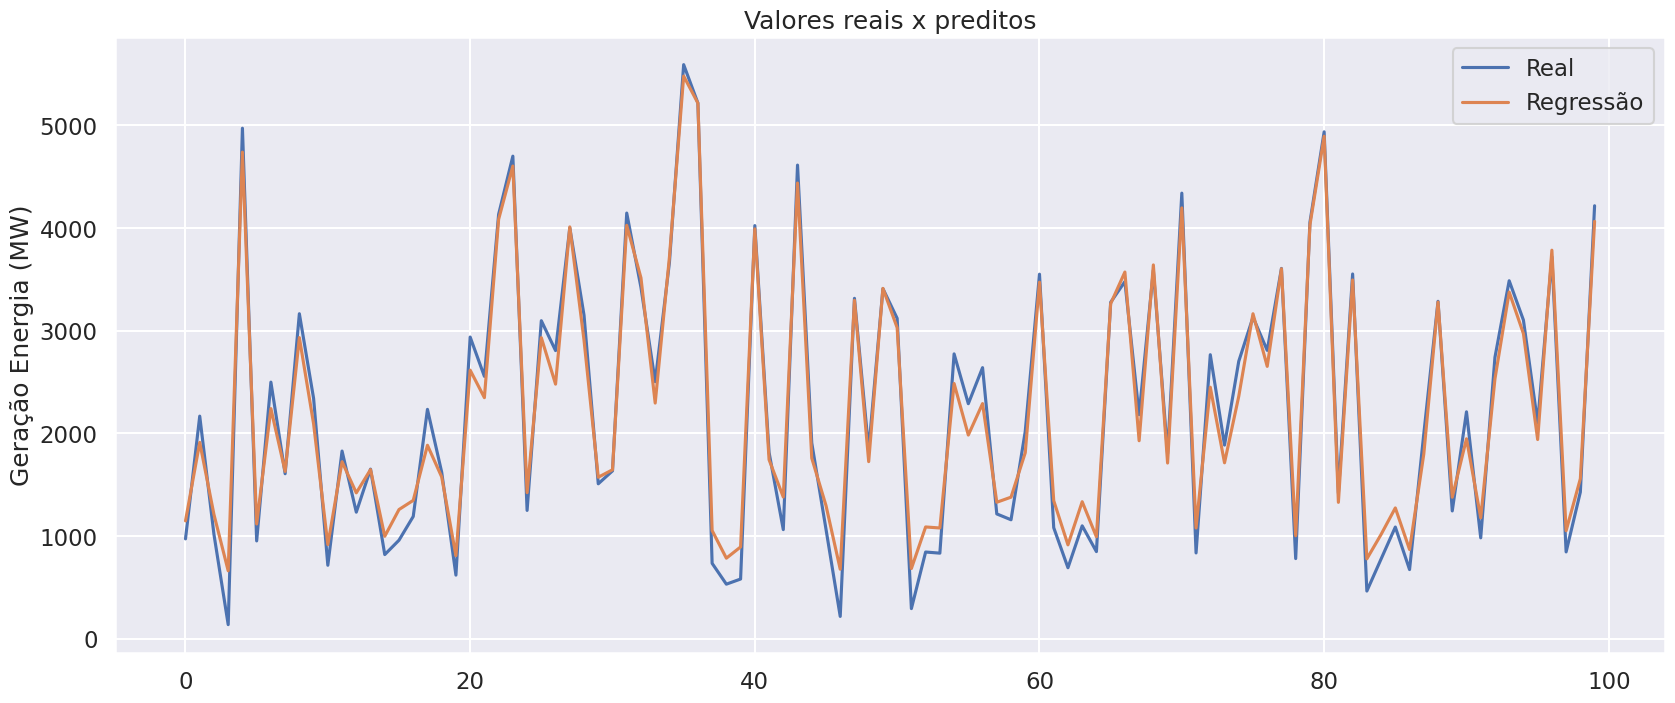

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("talk")
sns.set_style("darkgrid")

plt.figure(figsize=(20, 8))

sns.lineplot(scaler.inverse_transform(y_test).ravel()[-100:], label="Real")
sns.lineplot(scaler.inverse_transform(y_pred).ravel()[-100:], label="Regressão")

plt.title("Valores reais x preditos")
plt.ylabel("Geração Energia (MW)")
plt.legend()

plt.show()

# Exportando o modelo

In [ ]:
# Salvando o modelo
joblib.dump(model, dir_models / "svr.joblib")